In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from scipy.io import arff


data, meta = arff.loadarff('/content/dataset_61_iris (1).arff')
df = pd.DataFrame(data)

df['class'] = df['class'].str.decode('utf-8')

print(df.head())


   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [7]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
from scipy.stats import zscore

numeric_df = df.select_dtypes(include=['float64'])

 #Calculate Z-scores for each feature
z_scores = np.abs(zscore(numeric_df))

#  Define threshold
threshold = 3

#  Find outliers (rows where any z-score > threshold)
outliers = (z_scores > threshold).any(axis=1)

#  Display the outlier rows
outlier_rows = df[outliers]
print("Detected Outliers:")
print(outlier_rows)

#  print how many outliers were found
print(f"\nNumber of outliers: {outliers.sum()}")

Detected Outliers:
    sepallength  sepalwidth  petallength  petalwidth        class
15          5.7         4.4          1.5         0.4  Iris-setosa

Number of outliers: 1


In [19]:

numeric_df = df.select_dtypes(include=['float64'])


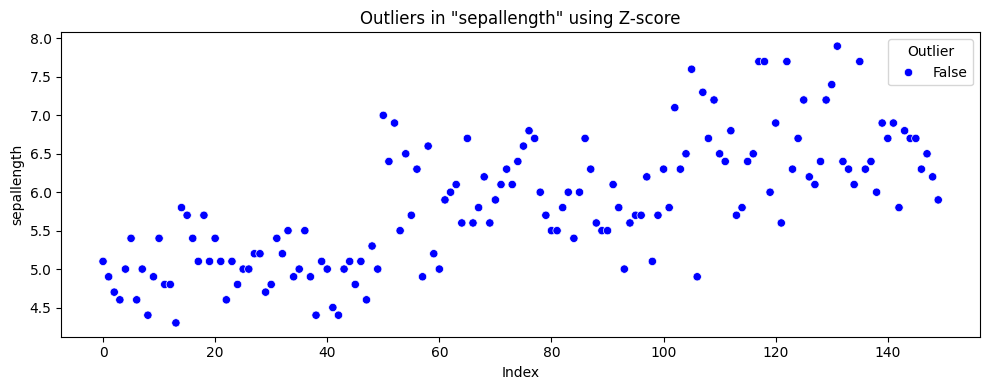

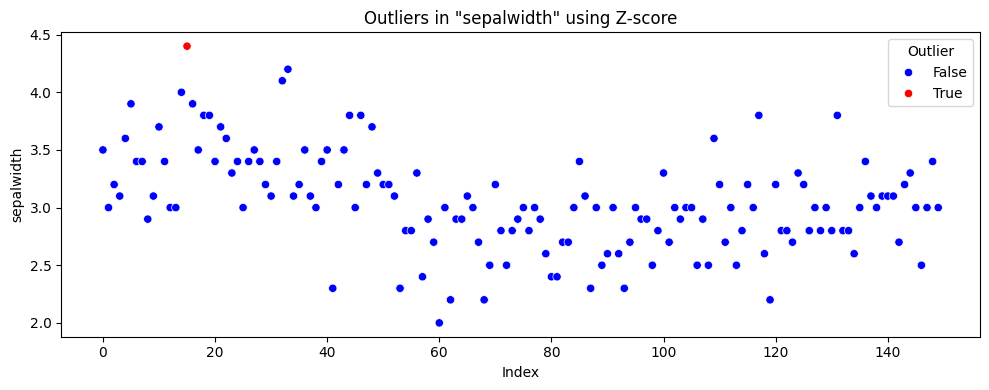

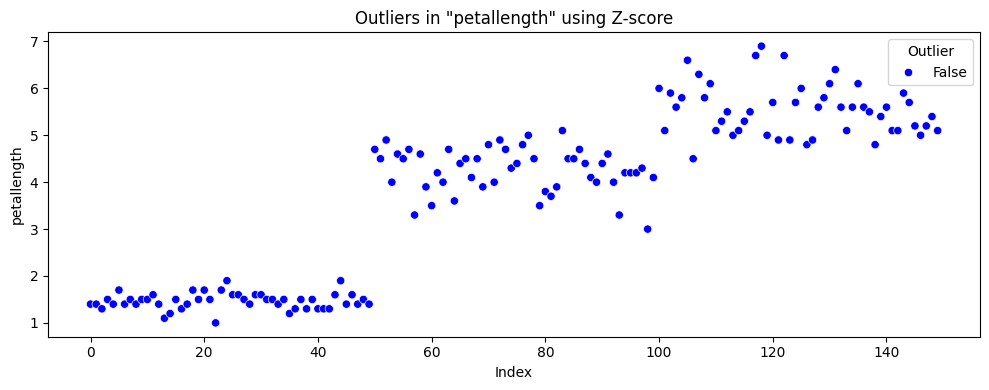

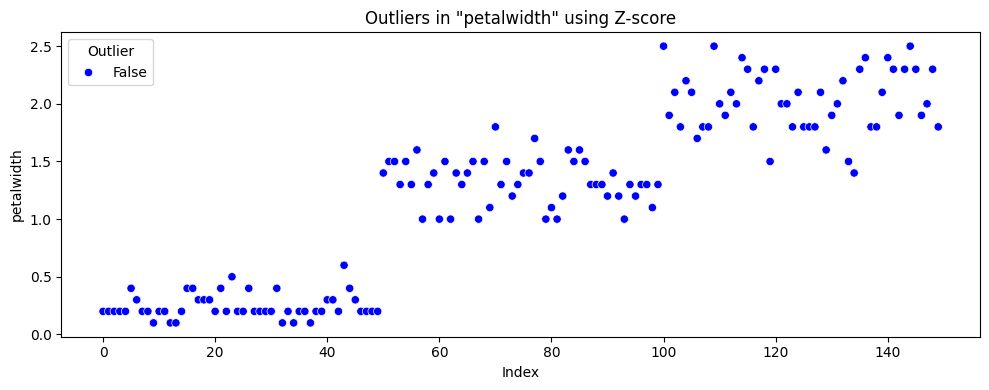

In [20]:
from scipy.stats import zscore

# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include=['float64'])

# Step 2: Compute Z-scores
z_scores = zscore(numeric_df)
z_df = pd.DataFrame(z_scores, columns=numeric_df.columns)

# Step 3: Threshold for outliers
threshold = 3
outliers_df = (abs(z_df) > threshold)

# Step 4: Plot outliers for each column
for col in numeric_df.columns:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=numeric_df, x=numeric_df.index, y=col,
                    hue=outliers_df[col], palette={False: "blue", True: "red"})
    plt.title(f'Outliers in "{col}" using Z-score')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend(title='Outlier')
    plt.tight_layout()
    plt.show()

In [21]:
# Remove the outlier(s) from the dataset
df_cleaned = df[~outliers].reset_index(drop=True)

# Check the new shape
print("New shape after removing outlier:", df_cleaned.shape)


New shape after removing outlier: (149, 5)


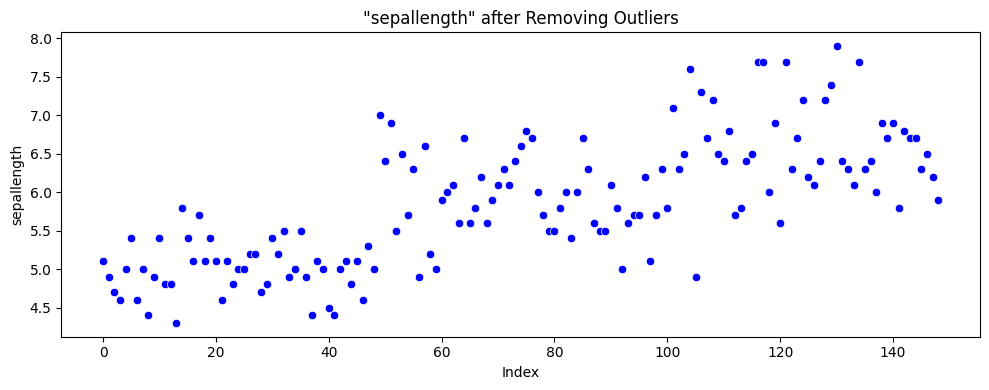

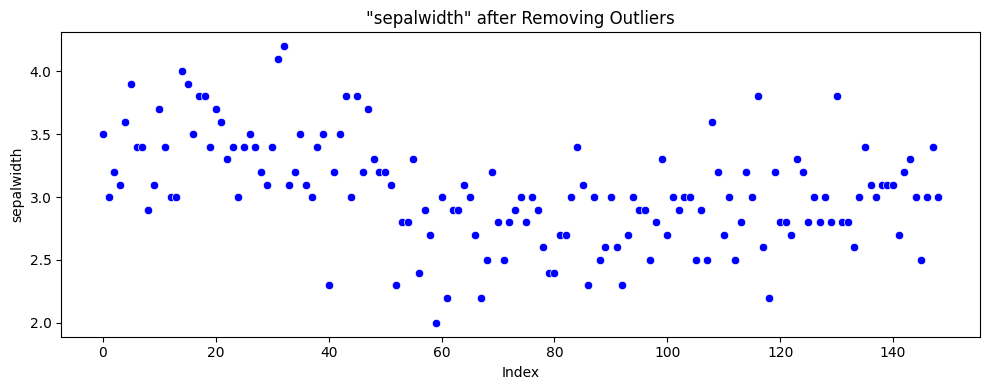

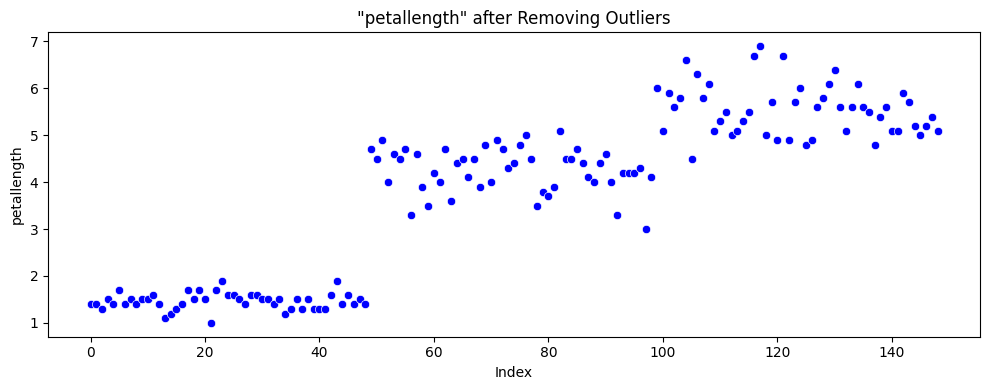

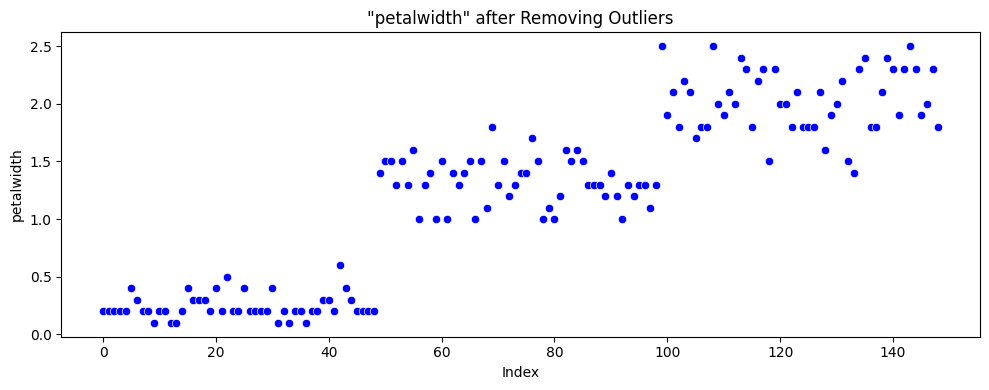

In [24]:
for col in numeric_df.columns:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df_cleaned, x=df_cleaned.index, y=col, color='blue')
    plt.title(f'"{col}" after Removing Outliers')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [26]:
df.isnull().sum()

,0
sepallength,0
sepalwidth,0
petallength,0
petalwidth,0
class,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class']) #convert from obj to categoty

In [28]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


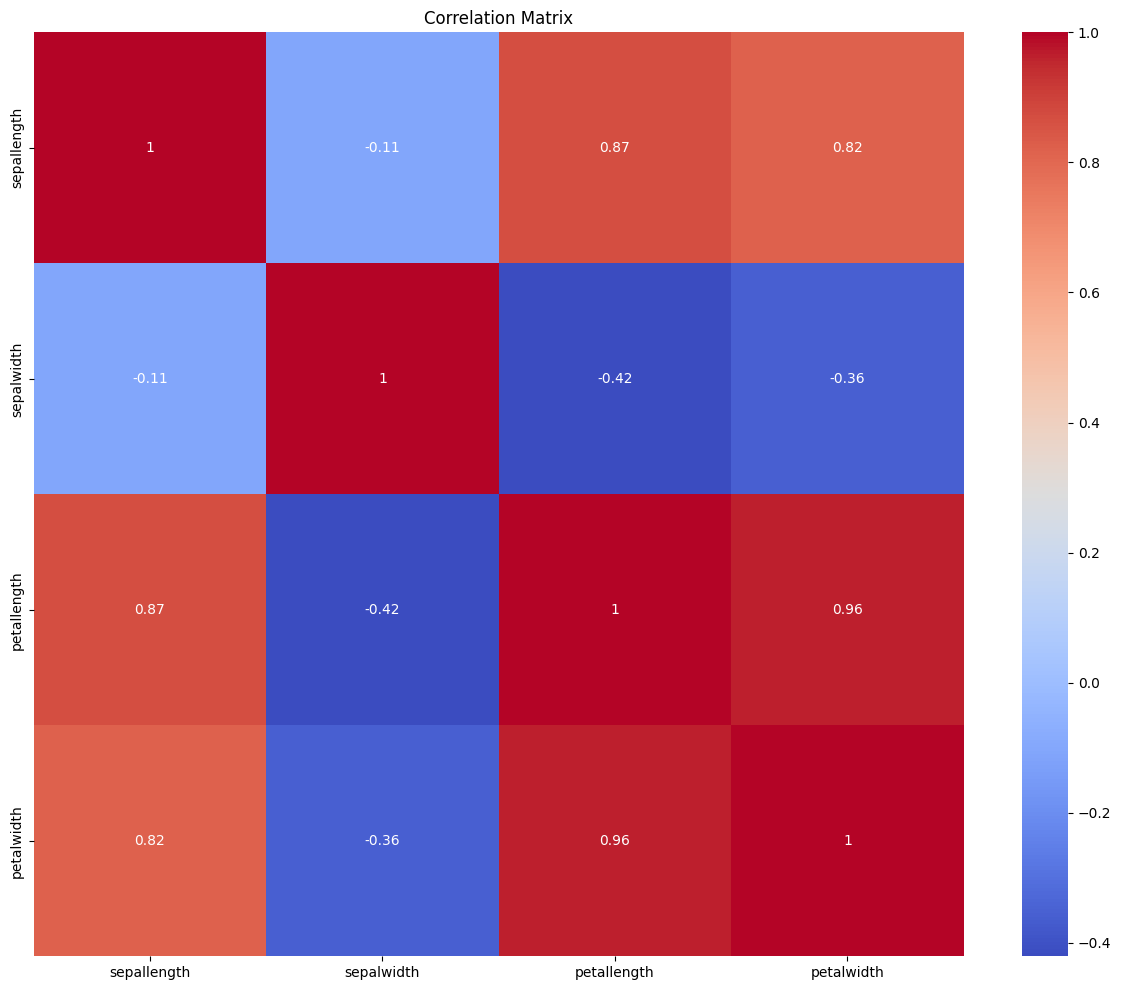

In [29]:
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df.drop('class',axis=1)
y=df['class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=42)


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
#Train Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [64]:
y_pred_gini = dt_gini.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
print(" Gini Accuracy:", accuracy_score(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

 Gini Accuracy: 0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [67]:
#Train Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy',  max_depth=2,random_state=42)
dt_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [68]:
y_pred_entropy = dt_entropy.predict(x_test)

In [69]:
print(" Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

 Entropy Accuracy: 0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
dt = DecisionTreeClassifier(random_state=42)

# define parameter
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [72]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)


In [74]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [76]:
best_dt = grid_search.best_estimator_

# show Best Parameters:
print(" Best Parameters:", grid_search.best_params_)

 Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [78]:
y_pred = best_dt.predict(x_test)

In [81]:
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_default = RandomForestClassifier(random_state=42)

In [85]:
rf_default.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred_rf_default = rf_default.predict(x_test)

In [88]:
print(" Accuracy:", accuracy_score(y_test, y_pred_rf_default))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_default))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred_rf_default))

 Accuracy: 1.0
 Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/tmp/ipython-input-1655747079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
/tmp/ipython-input-1655747079.py:13: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


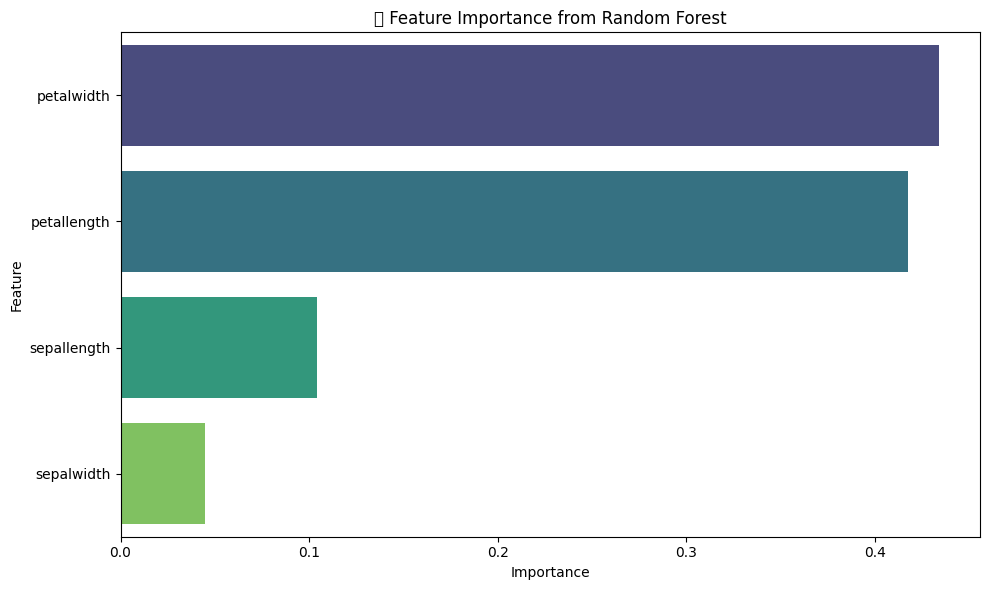

In [92]:
importances = rf_default.feature_importances_

# build dataframe
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

#  plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('🔍 Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

In [94]:
rf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
rf_entropy.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

In [96]:
y_pred_entropy = rf_entropy.predict(x_test)

In [97]:
print("Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

Entropy Accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [98]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],       # Maximum depth of each tree
    'criterion': ['gini', 'entropy']      # Splitting criterion
}


In [99]:
# Create the base Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [100]:
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                                 # 5-fold cross-validation
    scoring='accuracy',                   # Use accuracy as evaluation metric
    n_jobs=-1,                            # Use all CPU cores
    verbose=1                             # Print progress while running
)


In [101]:
# Fit the model to the training data
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [104]:
# Get the best model found by GridSearch
best_rf = grid_search.best_estimator_


In [106]:
# Predict on the test set using the best model
y_pred_best = best_rf.predict(x_test)


In [107]:
# Display the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


In [108]:
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

